In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
pd.options.mode.chained_assignment = None

C:\Users\met48\AppData\Local\Temp\ipykernel_21476\699654394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
merge = pd.read_csv('allsources_percentiles.csv')

In [3]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25007 entries, 0 to 25006
Data columns (total 37 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Authors                                                25007 non-null  object 
 1   Title                                                  25007 non-null  object 
 2   Year                                                   25007 non-null  int64  
 3   Source                                                 25007 non-null  object 
 4   ArticleURL                                             25007 non-null  object 
 5   DOI                                                    25007 non-null  object 
 6   Cites                                                  25007 non-null  float64
 7   capture.READER_COUNT_plumx                             25007 non-null  float64
 8   citation.Scopus_plumx                         

# Bibliometric index

In [4]:
cites_mean = (merge['citation.Scopus_plumx']+merge['citation.CrossRef_plumx']+merge['citation.Academic Citation Index (ACI) - airiti_plumx']+merge['citation.PubMed_plumx'])/4
engagement_mean = (merge['capture.READER_COUNT_plumx']+merge['mention.ABSTRACT_VIEWS_plumx']+merge['mention.DOWNLOAD_COUNT_plumx']+merge['mention.FULL_TEXT_VIEWS_plumx']+merge['capture.EXPORTS_SAVES_plumx']+merge['readers.citeulike_altmetrics']+merge['readers.mendeley_altmetrics']+merge['readers.connotea_altmetrics']+merge['readers_count_altmetrics'])/9
biblio_mean = 0.5*cites_mean+0.5*engagement_mean
biblio_index = biblio_mean.rank(pct=True) 

<Axes: >

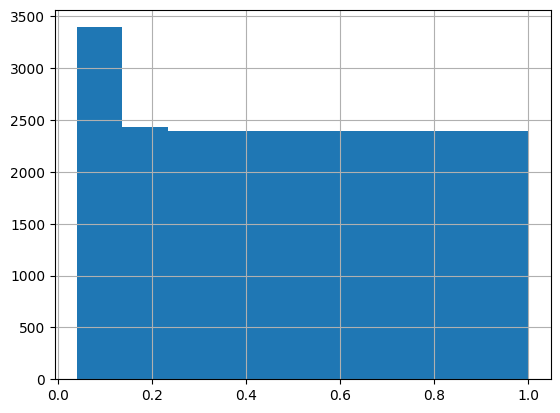

In [5]:
biblio_index.hist()

# Social Media 

In [6]:
sm_mean = (merge['cited_by_posts_count_altmetrics']+merge['cited_by_accounts_count_altmetrics']+merge['cited_by_tweeters_count_altmetrics']+
           merge['mention.FACEBOOK_COUNT_plumx']+merge['cited_by_fbwalls_count_altmetrics']+merge['cited_by_linkedin_count_altmetrics']+
           merge['cited_by_weibo_count_altmetrics'])/7
sm_index = sm_mean.rank(pct=True)

<Axes: >

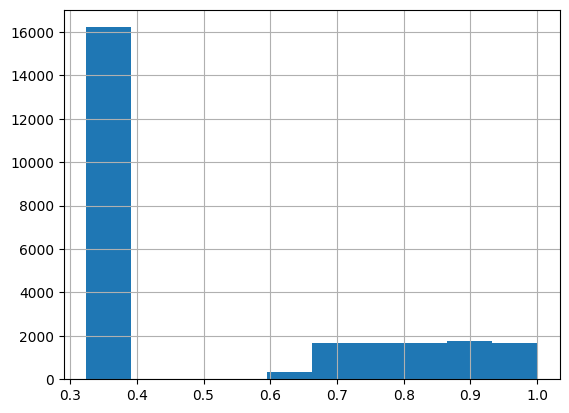

In [7]:
sm_index.hist()

# News Media

In [8]:
nm_mean = (merge['cited_by_msm_count_altmetrics']+merge['mention.NEWS_COUNT_plumx'])/2
nm_index = nm_mean.rank(pct=True)

<Axes: >

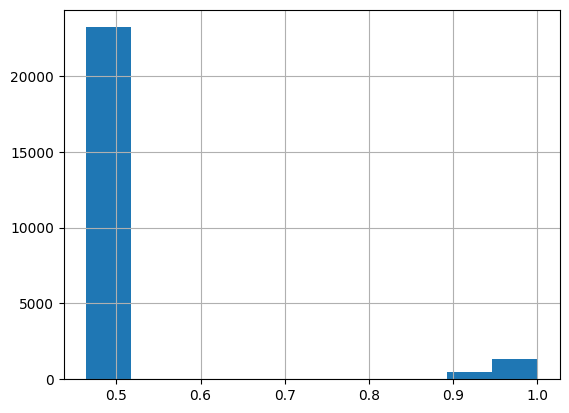

In [9]:
nm_index.hist()

# Patents

In [10]:
patent_mean = (merge['cited_by_patents_count_altmetrics']+merge['citation.Patent Families_plumx'])/2
patent_index = patent_mean.rank(pct=True)

<Axes: >

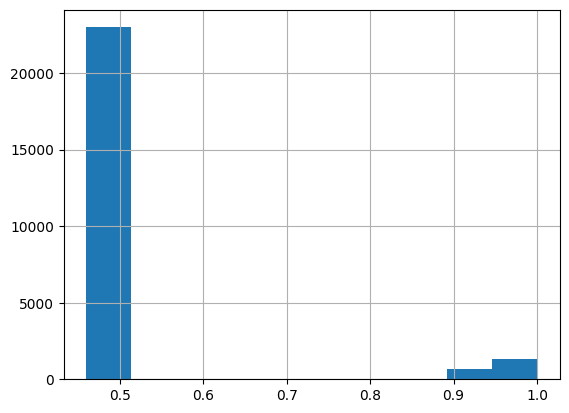

In [11]:
patent_index.hist()

# Policies

In [12]:
policy_mean = (merge['citation.Policy Citation_plumx']+merge['cited_by_policies_count_altmetrics'])/2
policy_index = policy_mean.rank(pct=True)

<Axes: >

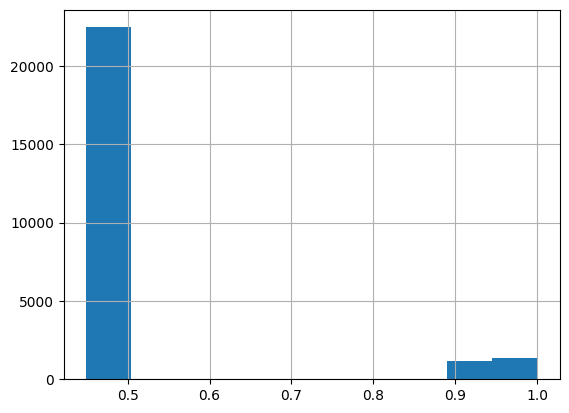

In [13]:
policy_index.hist()

# Journal Impact Factor

In [14]:
jif_index = merge['impact_factor']

<Axes: >

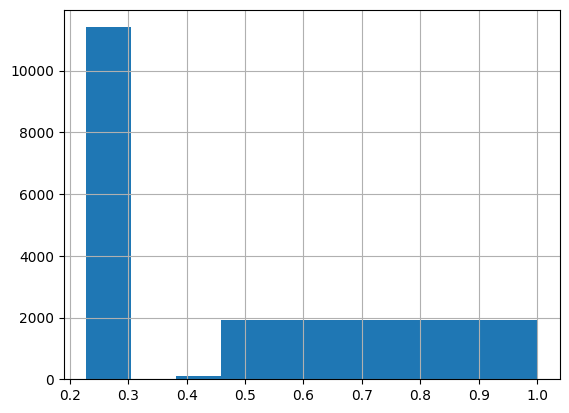

In [15]:
jif_index.hist()

# Misc

In [16]:
misc_mean = (merge['cited_by_feeds_count_altmetrics']+merge['cited_by_videos_count_altmetrics']+merge['cited_by_wikipedia_count_altmetrics'])/3
misc_index = misc_mean.rank(pct=True)

<Axes: >

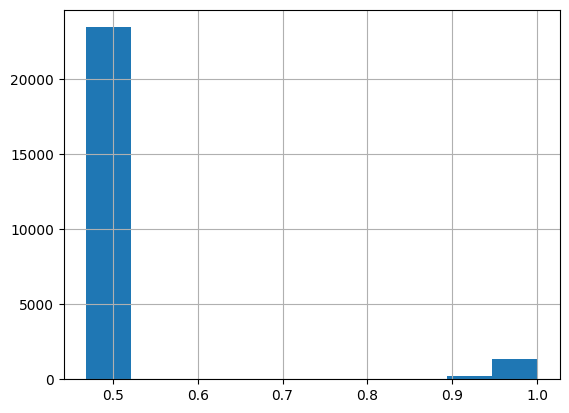

In [17]:
misc_index.hist()

# Overall Index

In [18]:
overall_mean = 0.5*biblio_index+0.1*sm_index+0.1*nm_index+0.1*patent_index+0.1*policy_index+0.05*jif_index+0.05*misc_index
overall_index = overall_mean.rank(pct=True)

<Axes: >

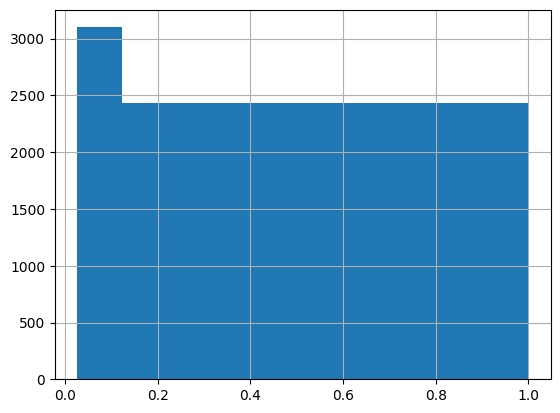

In [19]:
overall_index.hist()

In [20]:
overall_index

0        0.239093
1        0.702723
2        0.544608
3        0.690867
4        0.710561
           ...   
25002    0.666853
25003    0.981645
25004    0.347903
25005    0.739313
25006    0.483944
Length: 25007, dtype: float64

In [21]:
final_indices_df = merge[['Authors', 'Title', 'Year', 'Source', 'ArticleURL', 'DOI']]
final_indices_df['biblio_index'] = biblio_index
final_indices_df['sm_index'] = sm_index
final_indices_df['nm_index'] = nm_index
final_indices_df['patent_index'] = patent_index
final_indices_df['policy_index'] = policy_index
final_indices_df['jif_index'] = jif_index
final_indices_df['misc_index'] = misc_index
final_indices_df['overall_index'] = overall_index

In [22]:
final_indices_df

,Authors,Title,Year,Source,ArticleURL,DOI,biblio_index,sm_index,nm_index,patent_index,policy_index,jif_index,misc_index,overall_index
0,"K. P. Wiederhold, Y. Yamaguchi, A. Ayala, M. M...",Ti/TiN coatings for microfabricated cantilever...,2000,Journal of Vacuum Science &amp; Technology B: ...,http://dx.doi.org/10.1116/1.591356,10.1116/1.591356,0.266965,0.324209,0.464030,0.459671,0.449214,0.227956,0.468529,0.239093
1,"Carolyn A. Marr, Linda French, Donna Thompson,...",Animal-Assisted Therapy in Psychiatric Rehabil...,2000,Anthrozoös,http://dx.doi.org/10.2752/089279300786999950,10.2752/089279300786999950,0.804815,0.324209,0.464030,0.459671,0.449214,0.227956,0.468529,0.702723
2,"Shiela J. Heater, Mary W. Carrano, Douglas Rai...",Interaction of Oxo-Bridged Vanadium(III) Phena...,2000,Inorganic Chemistry,http://dx.doi.org/10.1021/ic000389r,10.1021/ic000389r,0.579078,0.324209,0.464030,0.459671,0.449214,0.622566,0.468529,0.544608
3,"Walter E. Rudzinski, Tejraj M. Aminabhavi, Ste...",Isolation and Characterization of the Saturate...,2000,Energy &amp; Fuels,http://dx.doi.org/10.1021/ef990207h,10.1021/ef990207h,0.613068,0.724897,0.464030,0.950734,0.449214,0.227956,0.468529,0.690867
4,"John P Tiefenbacher, Frederick A Day, Joseph A...",Attributes of repeat visitors to small tourist...,2000,The Social Science Journal,http://dx.doi.org/10.1016/s0362-3319(00)00063-x,10.1016/s0362-3319(00)00063-x,0.641021,0.668773,0.464030,0.459671,0.973667,0.227956,0.468529,0.710561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25002,"Ishola, Adenrele A.; Valles, Damian",Enhancing Safety and Efficiency in Firefightin...,2023,Sensors,https://www.mdpi.com/1424-8220/23/10/4628,10.3390/s23104628,0.478226,0.891590,0.954693,0.459671,0.449214,0.941057,0.468529,0.666853
25003,"Zhu, Jie; Chen, Cheng; Lu, Liping; Shikany, Ja...","Folate, Vitamin B <sub>6</sub> , and Vitamin B...",2023,JAMA Network Open,https://jamanetwork.com/journals/jamanetworkop...,10.1001/jamanetworkopen.2022.50621,0.930539,0.999560,0.998280,0.459671,0.449214,0.992342,0.970568,0.981645
25004,"Schepis, Ty S.; Rogers, Andrew H.; Munoz, Lili...",Indirect effects of emotion regulation in the ...,2024,Addictive Behaviors,https://linkinghub.elsevier.com/retrieve/pii/S...,10.1016/j.addbeh.2024.107983,0.217159,0.324209,0.965650,0.459671,0.449214,0.983165,0.468529,0.347903
25005,"McAllister, Matthew J.; Gonzalez, Drew E.; Leo...",Firefighters With Higher Cardiorespiratory Fit...,2022,Journal of Occupational & Environmental Medicine,https://journals.lww.com/10.1097/JOM.000000000...,10.1097/JOM.0000000000002632,0.853081,0.324209,0.464030,0.459671,0.449214,0.227956,0.468529,0.739313


In [23]:
final_indices_df.to_csv("final_indices_df.csv", index=False)